# Create the RLFED environment

# This is a Multi-Arm-Bandit Environment Simulation for Education

There are a few ways in which we can think about reinforcement learning problems for education. In some instances, we might think of unique content recommendations to students to optimise their learning, in other instances, we might think about solving a problem related to a tailor-made intervention for students. In this notebook, we will start with contextualising an environment that represents this problem - and contextualise the problem for the Education fit.

Before we begin, there are a few things we need to contextualise:

In the context of this RLFED (Reinforcement learning for education) environment, we are approaching the problem in the following way:
- This is a systems level problem that is being solved. That is, that the problem we are solving is about a systems level approach rather than an individual based optimisation problem
- The first step is a class classification task to classify what category of risk the student belongs to so that the correct intervention and data can be rendered based on the specific student needs. There are several experiments around this classification problem, but in the first instance we are assuming that the classification was a perfect world scenario - that is, that the classification was perfect for the given student.
- The MAB (multi armed bandit) arms each represents an intervention. In the experiment, we will have 4 arms, representing the following instances: Arm 1; the incorrect intervention, Arm 2; an intervention with an unknown consequence, Arm 3; the ideal intervention, Arm 4; an intervention that may work, but not for all instances.
- All the intervention distributions per class are labelled by experts, and that the interventions are perfect. This means that we will assume that if the correct arm is being pulled for a given student, that this means that the correct intervention was used given this problem based on an offline evaluation of the intervention.

### The system level problem
According to XXX, higher education system-based interventions have the following parameters broad parameters, based on the group or category of student that the system has to accommodate. These four groups or classes of interventions that are given within higher education are dependent on the student needs and the problems they face. 

- 1) the student will pass, no matter the intervention
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

On average, the majority of the students who met the entry requirements for a specific degree need minimal to no input to pass their qualification. The exact number has not been agreed upon yet as a domain standard, but according to XXX et al., (2010) and XXX et al., (2015) the majority of students that will pass, without intervention is roughly 65%. We can therefore say that 65% of a given student cohort is roughly category 1.

According to XXX et al., (2012), 20% of students are likely to pass if a specific or specialised intervention is given, and without such an intervention, they are 50% likely to fail, we will constitute this as category 2.

According to XXX et al., (2018), 10 - 20% of students will fail within a given system if the right intervention is not given, and if the right intervention is given, are still likely to fail. We will group this as category 3.

According to XXX et al., (2015), 5 - 10% of students will fail within a system due to reasons outside the control of the system. If an intervention is given to these students, they are still likely to fail with little to no chance of success. We will group this as category 4.

This means that we have the following categorical distribution os students in relation to the distributions they need within a system:

**Then we can say that the reward probabilities are associated with the class classifications and the different arms represent the recommendation.**

Let us further add some context and say that the system is not perfect, and we will recommend the incorrect intervention to students. As a result:

- Recommendation 1; the incorrect intervention
- Recommendation 2; an intervention with an unknown consequence
- Recommendation 3; the ideal intervention
- Recommendation 4; an intervention that may work, but not for all instances.


|Name of Category| The % distribution within cohort| Likelyhood to pass for Recommendation 1|Likelyhood to pass for Recommendation 2|Likelyhood to pass for Recommendation 3|Likelyhood to pass for Recommendation 4|
|----------------|---------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|----------------------------------------|
|Category 1| 65% of cohort|100%|100%|100%|100%|
|Category 2| 20% of cohort|50%|50%|100%|70%|
|Category 3| 10% of cohort|0%|0%|100%|25%|
|Category 4| 5% of cohort |0%|0%|50%|0%|

In the first instance, we are setting up a basic environment to incorporate the aforementioned parameters. A few things to note:
1) the environment and experiments do not classify the student. This is an entirely different problem according to XXX et al., (2020)

2) each of the categories will make use of a different environment (4 environments). This is so that the experiments per category and the impact of the experiments per category can be viewed separately.

3) there will be 4 choices of recommendations, which will rather represent the type of recommendations than a specific recommendation itself.

### Adding the dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### This is the basic overview of the environment:

In [5]:
class Environment(object):

  def __init__(self, reward_probabilities, actual_rewards):
    if len(reward_probabilities) != len(actual_rewards):
      raise Exception(f"size of reward_probabilities : {len(reward_probabilities)} does not match size of actual rewards : {len(actual_rewards)}")

    self.reward_probabilities = reward_probabilities
    self.actual_rewards = actual_rewards
    self.k_arms = len(reward_probabilities)

  def choose_arm(self, arm):
    if arm < 0 or arm >= self.k_arms:
      raise Exception(f"arm must be between 0 and {self.k_arms -1}")

    return self.actual_rewards[arm] if np.random.random() < self.reward_probabilities[arm] else 0.0

Let us add the reward probabilities to the environment. In this instance, we are pulling 4 arms. So, let us do a sanity check. If I declare the environment and assume that I know the reward probabilities (or the distribution of the reward probabilities) and I know the actual rewards per arm, then if I pull the arm 10 times, it will resemble the distribution of each arm (more or less)

In [6]:
env = Environment(reward_probabilities=[0.6, 0.1, 0.8, 0.5], actual_rewards=[1.0, 1.0, 1.0, 1.0])

For arm (0) or the first arm, we expect 6, for the socond arm (1) we expect 1, for the third arm (2) we expect 8, and the fourth arm (3) we expect 5.

In [7]:
[env.choose_arm(0) for _ in range(10)]

[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0]

In [8]:
[env.choose_arm(1) for _ in range(10)]

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
[env.choose_arm(2) for _ in range(10)]

[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]

In [10]:
[env.choose_arm(3) for _ in range(10)]

[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]

This is indeed the case, so let us move on the the next step, by defining the different environment class probabilities

# Adding context

In the above mentioned code, the environment is base skeleton and as simple as it can be. In fact, in the example above the class classifications are not even factored in. Let us recap, and assume the following example given 4 numbers:
- 1) the student will pass, no matter the intervention
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

**Keep in mind:**
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

To implement this, for simplicity’s sake, we will create an environment for each of the aforementioned classes of students. We will also assume that there is an expert panel that decides the interventions for each of the classes above. We are not concerned over which intervention fits with which problem and will assume that the right arm for the right intervention, follows the conditions above. Let us also say that we give the ideal intervention the majority of the time, and the incorrect intervention etc. the minority of the time

In [12]:
env1 = Environment(reward_probabilities=[0.15, 0.15, 0.55, 0.15], actual_rewards=[1.0, 1.0, 1.0, 1.0])

Next, let us build an environment for the following condition:
- 2) the student will fail, but will pass if the correct intervention is given and stand a 70% chance of passing if the intervention that may work is recommended, and 50% if an incorrect intervention or an intervention with an unknown consequence is given

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [13]:
env2 = Environment(reward_probabilities=[0.15, 0.15, 0.55, 0.15], actual_rewards=[0.0, 0.5, 1.0, 0.7])

Next, let us build an environment for the following condition:
- 3) the student will fail, but will only pass if the correct intervention is given, and stand a 50% chance of passing if the intervention that may work is recommended, 25% chance that an unknown intervention is recommended

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [14]:
env3 = Environment(reward_probabilities=[0.15, 0.15, 0.55, 0.15], actual_rewards=[0.0, 0.0, 1.0, 0.5])

Next, let us build an environment for the following condition:
- 4) the student will fail, but will only pass 50% of the time if the correct intervention is given

Keep in mind
- Arm 1; the incorrect intervention
- Arm 2; an intervention with an unknown consequence
- Arm 3; the ideal intervention
- Arm 4; an intervention that may work, but not for all instances.

In [15]:
env4 = Environment(reward_probabilities=[0.15, 0.15, 0.55, 0.15], actual_rewards=[0.0, 0.0, 0.5, 0.0])

# Incremental Sampling For Non-Stationary Bandit Problems
## new_estimage = old_estimate + (1/n) * (reward - old_estimate)

Calculationg Average Through Incremental Sampling
The obvious way to calculate the average of a finite set of numbers it to sum the list of numbers and divide by the length of the list. However, it is not always feasible to store all numbers into a list before calculating their average. The incremental sampling technique is a memory-efficient way of estimating the average of a larger collection of numbers on the fly.   

In the incremental sampling formular above, the term (1/n) gets smaller as n gets larger. This means that, rewards from later time steps contribute little to the new estimate of the average and this makes it unfit for bandit problems with non-stationary reward distributions. To curb this, another form of this formula with a fixed step size should be used. The step size must be a number between 0 and 1. This way, rewards from later time steps contribute more to the estimation of the average and this makes it fit for non-stationary bandit problems. The following general update rule is very common throughout Reinforcement Learning especially in Temporal Difference learning algorithms.

## new_estimage = old_estimate + (step_size) * (reward - old_estimate)

Let's verify this in code.

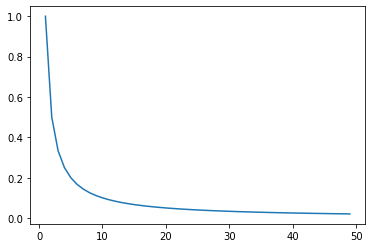

In [12]:
time_steps = np.arange(1,50)
weights = 1/time_steps
plt.plot(time_steps, weights)

As seen above, the highest weight is given at time 1, but as time = 1 + n occurs, the weight decreases

# Creating the agent

So in the sections below, I will play with different RL agent algorithms, starting with the baseline, an agent that just randomly "pulls" an arm, or in this context, chooses an intervention based on the classification

In [13]:
class RandomAgent(object):

  def __init__(self, env, max_iterations=500):
    self.env = env
    self.iterations = max_iterations

    self.q_values = np.zeros(self.env.k_arms)
    self.arm_counts = np.zeros(self.env.k_arms)
    self.arm_rewards = np.zeros(self.env.k_arms)

    self.rewards = [0.0]
    self.cum_rewards = [0.0]

  def act(self):
    for i in range(self.iterations):
      arm = np.random.choice(self.env.k_arms)
      reward = self.env.choose_arm(arm)

      self.arm_counts[arm] = self.arm_counts[arm] + 1
      self.arm_rewards[arm] = self.arm_rewards[arm] + reward

      self.q_values[arm] = self.q_values[arm] + (1/self.arm_counts[arm]) * (reward - self.q_values[arm])
      self.rewards.append(reward)
      self.cum_rewards.append(sum(self.rewards) / len(self.rewards))

    return {"arm_counts": self.arm_counts, "rewards": self.rewards, "cum_rewards": self.cum_rewards}

In [35]:
test_env1 = env1
random_agent1 = RandomAgent(test_env1)
random_agent_result1 = random_agent1.act()

In [36]:
test_env2 = env2
random_agent2 = RandomAgent(test_env2)
random_agent_result2 = random_agent2.act()

In [37]:
test_env3 = env3
random_agent3 = RandomAgent(test_env3)
random_agent_result3 = random_agent3.act()

In [38]:
test_env4 = env4
random_agent4 = RandomAgent(test_env4)
random_agent_result4 = random_agent4.act()

In [39]:
total_rewards = sum(random_agent_result["rewards"])
print(f"Total Reward : {total_rewards}")

Total Reward : 55.5


In [40]:
print(f"Environment Reward Probabilities : {test_env.reward_probabilities}")
print(f"Random Agent Action Values : {random_agent.q_values}")

Environment Reward Probabilities : [0.62, 0.05, 0.87, 0.49]
Random Agent Action Values : [0.         0.         0.45867769 0.        ]


<BarContainer object of 4 artists>

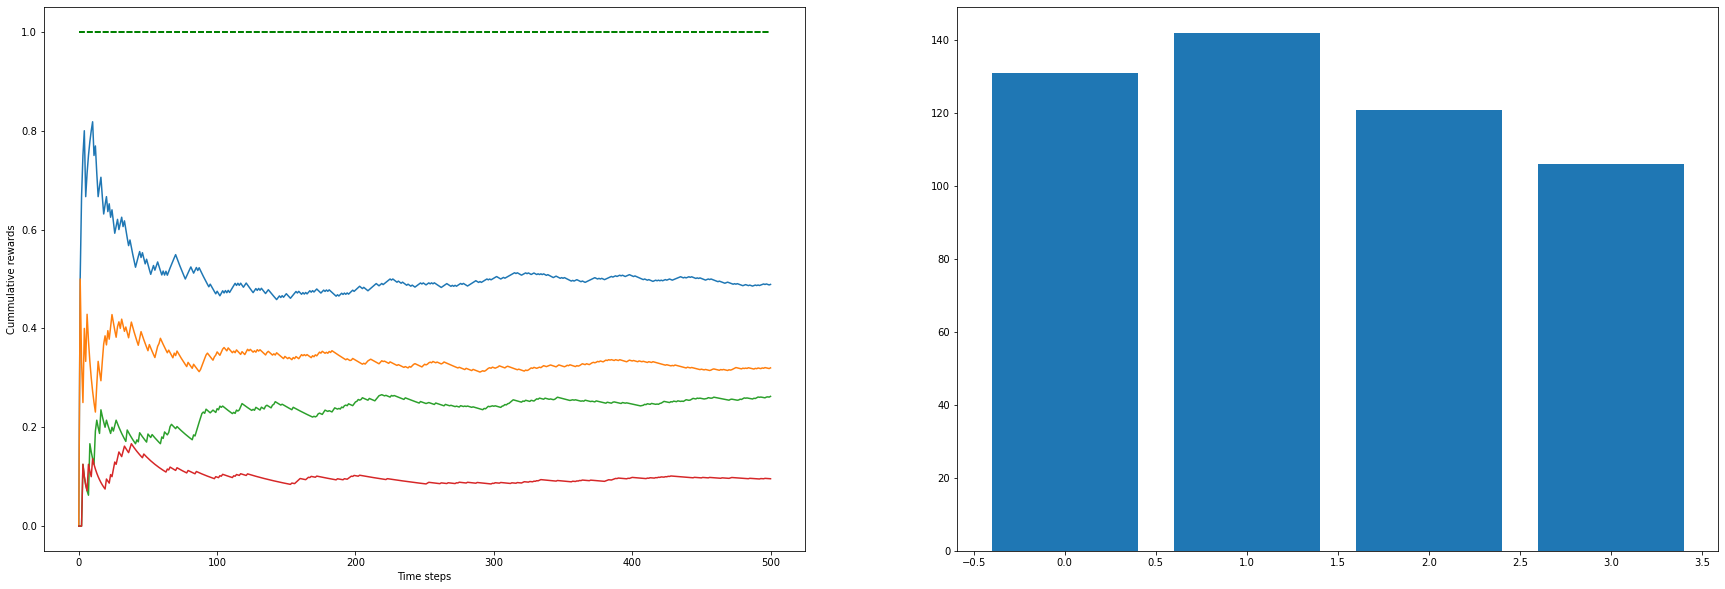

In [46]:
cum_rewards1 = random_agent_result1["cum_rewards"]
arm_counts1 = random_agent_result1["arm_counts"]

cum_rewards2 = random_agent_result2["cum_rewards"]
arm_counts2 = random_agent_result2["arm_counts"]

cum_rewards3 = random_agent_result3["cum_rewards"]
arm_counts3 = random_agent_result3["arm_counts"]

cum_rewards4 = random_agent_result4["cum_rewards"]
arm_counts4 = random_agent_result4["arm_counts"]

fig = plt.figure(figsize=[30,10])

ax1 = fig.add_subplot(121)
ax1.plot([1.0 for _ in range(random_agent1.iterations)], "g--", label="target cummulative reward")
ax1.plot([1.0 for _ in range(random_agent2.iterations)], "g--", label="target cummulative reward")
ax1.plot([1.0 for _ in range(random_agent3.iterations)], "g--", label="target cummulative reward")
ax1.plot([1.0 for _ in range(random_agent4.iterations)], "g--", label="target cummulative reward")
ax1.plot(cum_rewards1, label="cummulative rewards")
ax1.plot(cum_rewards2, label="cummulative rewards")
ax1.plot(cum_rewards3, label="cummulative rewards")
ax1.plot(cum_rewards4, label="cummulative rewards")
ax1.set_xlabel("Time steps")
ax1.set_ylabel("Cummulative rewards")

ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(len(arm_counts))], arm_counts)

Text(0, 0.5, 'Cumulative reward')

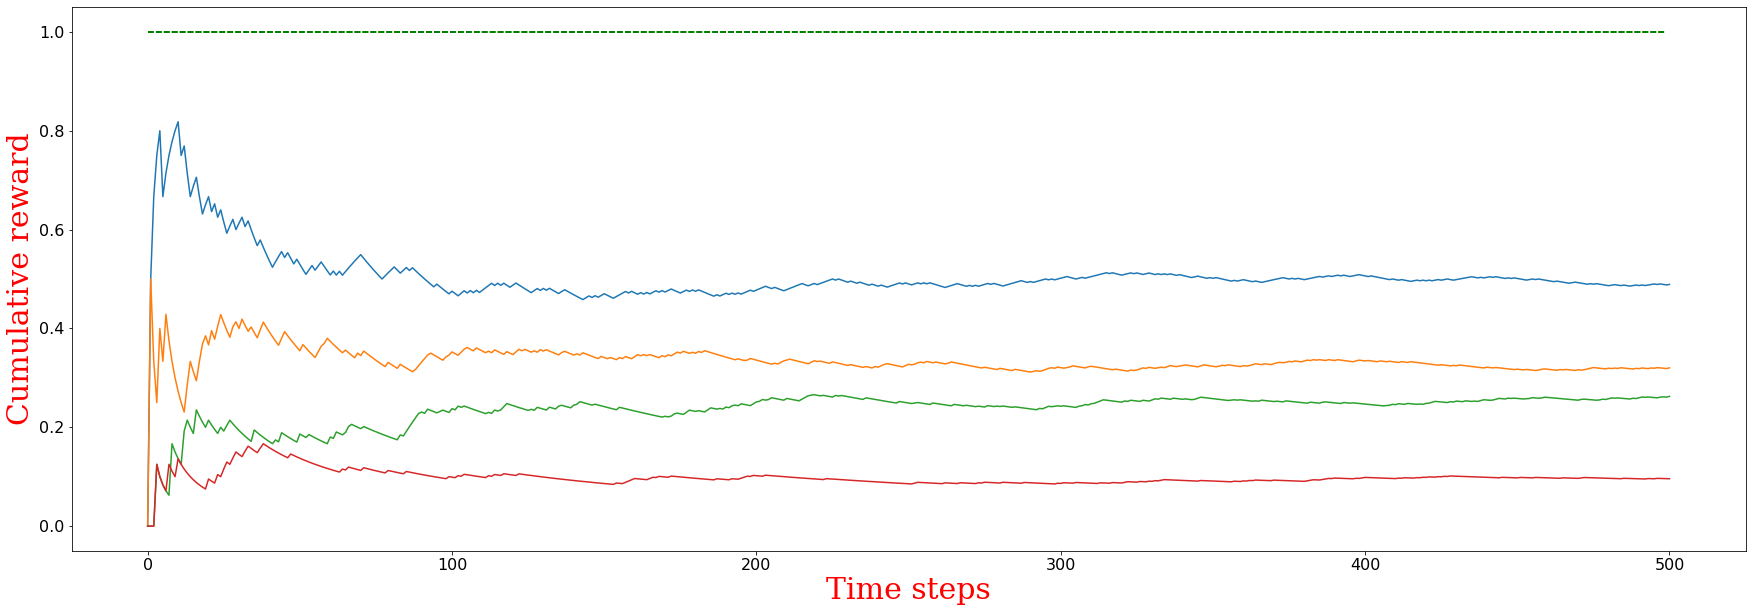

In [73]:
ax2 = plt.figure(figsize=[30,10])
plt.plot([1.0 for _ in range(random_agent1.iterations)], "g--", label="target cummulative reward")
plt.plot([1.0 for _ in range(random_agent2.iterations)], "g--", label="target cummulative reward")
plt.plot([1.0 for _ in range(random_agent3.iterations)], "g--", label="target cummulative reward")
plt.plot([1.0 for _ in range(random_agent4.iterations)], "g--", label="target cummulative reward")

plt.rcParams['font.size'] = '33'

plt.plot(cum_rewards1, label="cummulative rewards")
plt.plot(cum_rewards2, label="cummulative rewards")
plt.plot(cum_rewards3, label="cummulative rewards")
plt.plot(cum_rewards4, label="cummulative rewards")

plt.xlabel("Time steps", {'family':'serif','color':'red','size':30})
plt.ylabel("Cumulative reward", {'family':'serif','color':'red','size':30})